In [56]:
using DataFrames
using Dates
using SQLite
using Statistics
using StatsPlots


In [62]:
db = SQLite.DB("./data.sqlite3")
query = SQLite.Query(db, "SELECT * FROM requests;")
df = DataFrame(query)
#rows = []
#for row in query
#    push!(rows, row)
#end

df

,id,worker_id,start_time
,String⍰,Int64⍰,String⍰
1,03fddf0a-1cac-423a-ae28-4cf7e742cb36,2,2019-08-19 21:45:28.475824037-07:00
2,655bb52f-800b-4273-86c9-3403fc5c9262,0,2019-08-19 21:45:28.475643804-07:00
3,edafad15-bcea-4dea-9f02-c7b9438ae71c,6,2019-08-19 21:45:28.475925791-07:00
4,9effe4df-b558-4109-838b-c50c7e9cb11d,9,2019-08-19 21:45:28.475755268-07:00
5,ab2c1b7d-919d-4d54-a21a-ee4fd2b6c601,7,2019-08-19 21:45:28.475997109-07:00
6,a2bf7bf2-5371-4237-9dfe-7ad1670e7b3c,5,2019-08-19 21:45:28.475935583-07:00
7,73b65371-4464-4e16-8cb4-844aed8a8f55,1,2019-08-19 21:45:28.475805278-07:00
8,35e83254-900e-4354-a3cf-4cd0dd12e52e,3,2019-08-19 21:45:28.476278305-07:00
9,f03ec3c8-99c1-47dd-8ef0-24518d839f69,4,2019-08-19 21:45:28.476294118-07:00


In [65]:
function convert_time_string(s::String)::DateTime
    t = s[1:23]
    return DateTime(t, "y-m-d H:M:S.s")
end


df.start_time_2 = map(convert_time_string, df.start_time);
df.end_time_2 = map(convert_time_string, df.end_time);

test_start_time = minimum(df.start_time_2);
test_end_time = maximum(df.end_time_2)

df.start_time_s = map(t -> trunc(t, Dates.Second), df.start_time_2)

request_times = by(df, 
    :start_time_s, 
    min = :duration_ms => minimum, 
    mn = :duration_ms => mean,
    p90 = :duration_ms => (x -> quantile(x, 0.9)),
    p99 = :duration_ms => (x -> quantile(x, 0.99)),
    max = :duration_ms => maximum)

,start_time_s,min,mn,p90,p99,max
,DateTime,Int64,Float64,Float64,Float64,Int64
1,2019-08-19T21:45:28,117,190.559,243.8,268.36,271
2,2019-08-19T21:45:29,102,192.135,273.5,327.94,331
3,2019-08-19T21:45:30,85,186.673,245.7,286.94,290
4,2019-08-19T21:45:31,92,189.407,248.0,304.99,314
5,2019-08-19T21:45:32,91,184.648,245.7,276.87,288
6,2019-08-19T21:45:33,80,185.981,252.8,299.88,302
7,2019-08-19T21:45:34,94,200.24,284.5,337.12,343
8,2019-08-19T21:45:35,99,182.593,229.6,279.11,286
9,2019-08-19T21:45:36,96,191.412,258.0,290.0,296


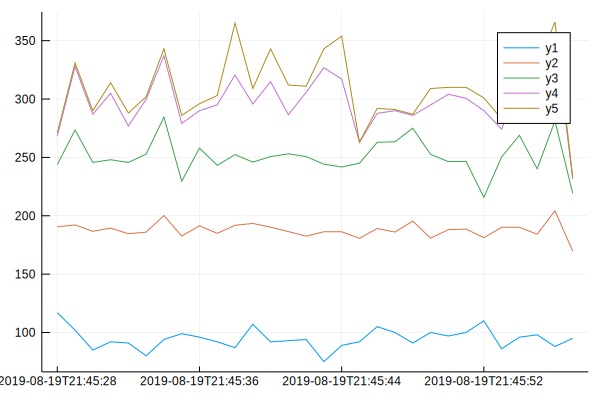

In [57]:
@df request_times plot(:start_time_s, [:min, :mn, :p90, :p99, :max])

In [70]:
rps = by(df, 
    [:start_time_s, :worker_id], 
    len = :id => length)
by(rps, :worker_id, :len => mean)

,worker_id,len_mean
,Int64⍰,Float64
1,2,5.3
2,0,5.03333
3,6,4.96667
4,9,5.2
5,7,5.1
6,5,5.06667
7,1,5.16667
8,3,5.13333
9,4,5.13333


In [63]:
1531/30

51.03333333333333